# 1. LeNet

## 0. module calling

In [1]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend #keras.backend : 
from tensorflow.keras.models import Sequential #keras.models.Sequential:
from tensorflow.keras.layers import Conv2D, AveragePooling2D,Flatten,Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adam 
from tensorflow.keras.utils import to_categorical
#SGD:
#RMSprop:
#Adam:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. data processing

(60000, 28, 28)

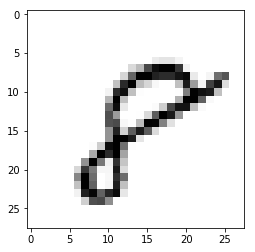

In [2]:
#dataset: MNIST
from tensorflow.keras.datasets import mnist

#data load
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#data confirm
plt.imshow(x_train[-1], cmap = 'Greys') #해 보니 color인데 숫자 이미지 판단에 흑백/컬러는 중요한게 아니니 'Greys'로 바꾼다.
x_train.shape #(total x_train number, height, width)


In [3]:
#흑백 영상은 각 픽셀이 0~1 사이의 실수로 된 2-D signal로 표현 할 수 있다. 
#이차원 신호와 흑백 이미지: 0~255 사이의 값을 0~1로 normalize
x_train, x_test = x_train / 255, x_test / 255

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [4]:
# one hot encoding for label classes
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
#we need channel in, so add one more space
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]
print(x_train.shape)#(total x_train number, height, width, channel in)
print(x_train[0].shape)

(60000, 28, 28, 1)
(28, 28, 1)


## 2. Build LeNet-5 model
https://bskyvision.com/418

In [6]:
def MyModel():
    return Sequential([Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding='same'),#Convolutional layers, input:32*32*1, filter_size:5x5, filters:6개, output:28*28*6
                        AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'), #Sub-sampling layers, receptive field:2x2, averagepooling, output:14*14*6
                        Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation= 'tanh', padding='valid'),#Convolution layers, filter_size:5x5, filters:16개, output:10*10*16
                        AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding= 'valid'), #Sub-sampling layers, receptive field:2x2, averagepooling, output:5*5*16
                        Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation= 'tanh', padding= 'valid'),
                       
                        Flatten(), #fully connection, 120
                        #Dense(120, activation = 'relu'),#120
                        Dense(84, activation = 'tanh'), #120 -> 84
                        Dense(10, activation = 'softmax') #84 -> 10
    ])

In [10]:
model = MyModel()
model.compile(optimizer = 'SGD', 
             loss = 'mean_squared_error', 
             metrics = ['accuracy'])


In [ ]:
model.fit(x = x_train, y = y_train, epochs = 10, batch_size = 128, validation_data = (x_test, y_test),verbose =1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))
